Import data

In [5]:
from scipy import io
import matplotlib.pyplot as plt
import numpy as np
import os

plt.rcParams['figure.figsize'] = [10, 10]
plt.rcParams.update({'font.size': 18})

X = io.loadmat(os.path.join('VORTALL.mat'))['VORTALL']

Compute the SVD of the data set and plot the singular value spectrum and the leading singular vectors.

In [6]:
U, S, VT = np.linalg.svd(X,full_matrices=False)

In [7]:
def plotFlow(X):
    vortmin = -5
    vortmax = 5
    V2 = np.copy(np.real(np.reshape(X,(449,199))))
    V2 = V2.T

    minval = np.min(V2)
    maxval = np.max(V2)

    if np.abs(minval) < 5 and np.abs(maxval) < 5:
        if np.abs(minval) > np.abs(maxval):
            vortmax = maxval
            vortmin = -maxval
        else:
            vortmin = minval
            vortmax = -minval

    V2[V2 > vortmax] = vortmax
    V2[V2 < vortmin] = vortmin

    plt.imshow(V2,cmap='jet',vmin=vortmin,vmax=vortmax)

    cvals = np.array([-4,-2,-1,-0.5,-0.25,-0.155])
    plt.contour(V2,cvals*vortmax/5,colors='k',linestyles='dashed',linewidths=1)
    plt.contour(V2,np.flip(-cvals)*vortmax/5,colors='k',linestyles='solid',linewidths=0.4)

    plt.scatter(49,99,5000,color='k')

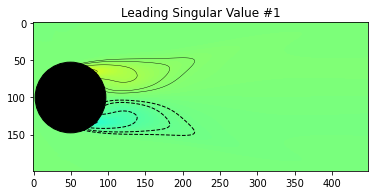

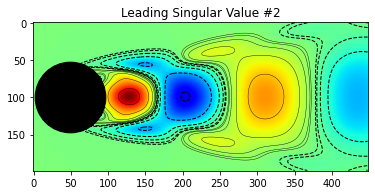

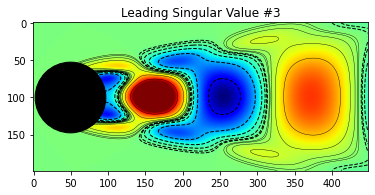

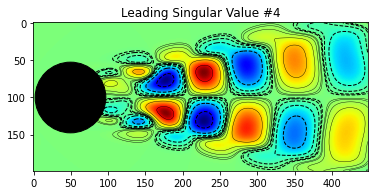

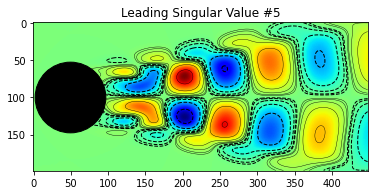

In [9]:
for i in range(5):
    plt.title('Leading Singular Value #' + str(i + 1))
    plotFlow(U[:,i])
    plt.show()

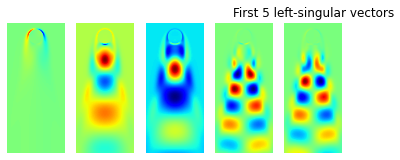

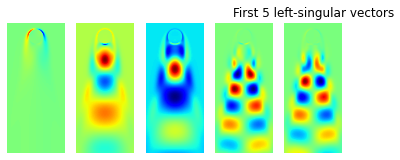

In [11]:
fig, axs = plt.subplots(1,5)
for i in range(5):
    V = np.copy(np.real(np.reshape(U[:,i],(449,199))))
    axs[i].imshow(V, cmap = 'jet')
    axs[i].axis('off')
plt.title("First 5 left-singular vectors")
plt.show()

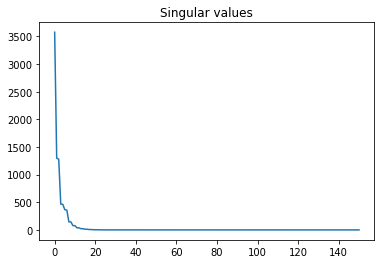

In [12]:
plt.plot(S)
plt.title("Singular values")
plt.show()

Plot the reconstructed movie for various truncation values.

In [21]:
import imageio

def createMovie(X):
    plt.rcParams['figure.figsize'] = [8, 8]
    filenames = []
    for j in range(150):
        plotFlow(X[:, j])
        filename = './pics/'+ str(j) + '.png'
        filenames.append(filename)
        plt.savefig(filename)
        plt.close()

    with imageio.get_writer('vortices.gif', mode='I') as writer:
        for filename in filenames:
            image = imageio.v2.imread(filename)
            writer.append_data(image)
    for filename in set(filenames):
        os.remove(filename)

FileNotFoundError: [Errno 2] No such file or directory: './pics/0.png'

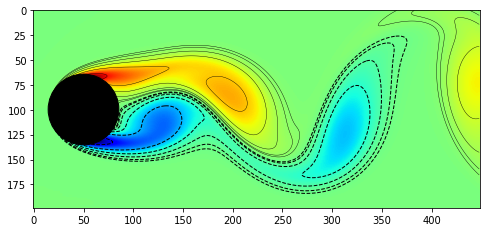

In [22]:
createMovie(X)

In [23]:
X_fro = np.linalg.norm(X, 'fro')
S_squared = np.square(S)
energy_approx = np.sqrt(np.cumsum(S_squared))/X_fro

energy_approx

array([0.87078921, 0.92639865, 0.97740635, 0.98399342, 0.9904548 ,
       0.99445158, 0.99826628, 0.9988992 , 0.99952409, 0.99970059,
       0.99987589, 0.99991749, 0.99995884, 0.99997296, 0.999987  ,
       0.99999158, 0.99999611, 0.99999753, 0.99999894, 0.99999932,
       0.99999971, 0.99999981, 0.99999992, 0.99999995, 0.99999998,
       0.99999999, 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.     

So as we can see, r = 2 captures over 90%, r = 5 over 99%, and r = 9 over 99.9%.

In [24]:
S_diag = np.diag(S)
Xapprox = U[:,:1] @ S_diag[0:1,:1] @ VT[:1,:]
err = np.linalg.norm(X - Xapprox, 'fro')/ np.linalg.norm(X, 'fro')

FileNotFoundError: [Errno 2] No such file or directory: './pics/0.png'

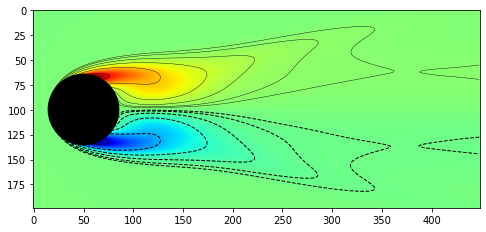

In [25]:
createMovie(Xapprox)

In [26]:
err

0.49165654162514344

FileNotFoundError: [Errno 2] No such file or directory: './pics/0.png'

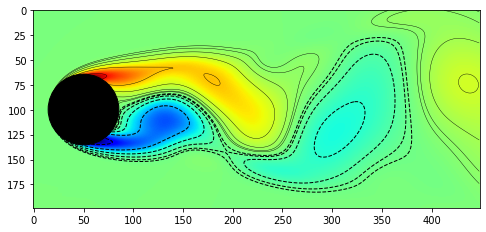

In [29]:
Xapprox = U[:,:4] @ S_diag[0:4,:4] @ VT[:4,:]
err = np.linalg.norm(X - Xapprox, 'fro')/ np.linalg.norm(X, 'fro')
createMovie(Xapprox)
print('Error is ' + str(err))

FileNotFoundError: [Errno 2] No such file or directory: './pics/0.png'

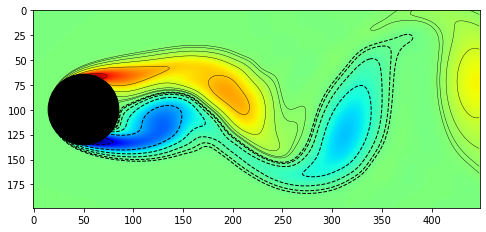

In [31]:
r = 9
Xapprox = U[:,:r] @ S_diag[0:r,:r] @ VT[:r,:]
err = np.linalg.norm(X - Xapprox, 'fro')/ np.linalg.norm(X, 'fro')
createMovie(Xapprox)
print('Error is ' + str(err))

In [32]:
r = 10

X_approx = U[:,:r] @ S_diag[0:r,:r] @ VT[:r,:]
W = S_diag[0:r,:r] @ VT[:r,:]
W.shape

(10, 151)

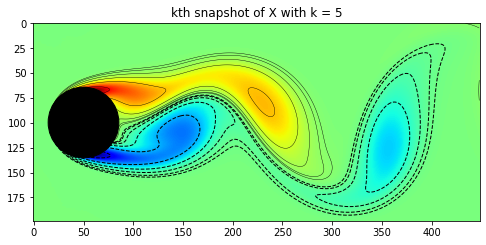

In [33]:
k = 5
plt.title('kth snapshot of X with k = ' + str(i+1))
plotFlow(X[:,k])
plt.show()

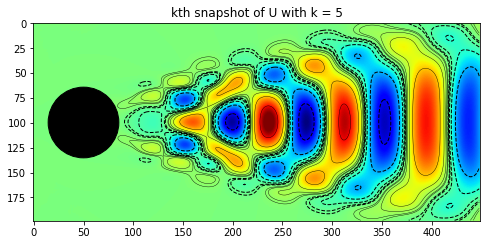

In [34]:
k = 5
plt.title('kth snapshot of U with k = ' + str(i+1))
plotFlow(U[:,k])
plt.show()

In [35]:
SVT = S_diag @ VT
m = 20
W = SVT[:,:m-1]
W_prime = SVT[:,1:m]

WU, WS, WVT = np.linalg.svd(W, full_matrices=False)

In [36]:
WS_diag = np.diag(WS)
W_pinv = WVT.transpose() @ np.linalg.inv(WS_diag) @ WU.transpose()
A = W_prime @ W_pinv

In [37]:
eig_A = np.linalg.eig(A)

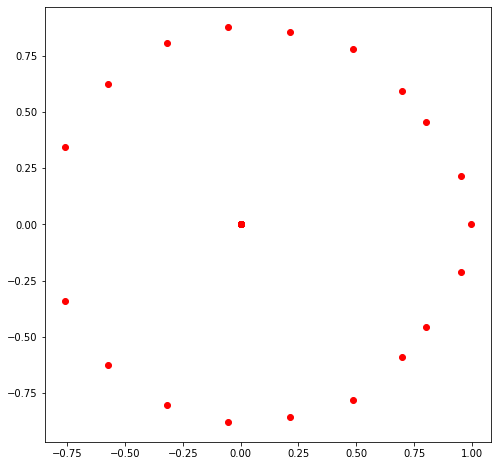

In [38]:
X = [x.real for x in eig_A[0]]
Y = [x.imag for x in eig_A[0]]
plt.scatter(X,Y, color='red')
plt.show()

In [41]:
w_old = SVT[:,:1]
w_ii = SVT[:,:1]
SVT_new = SVT[:,:1]
for i in range(1,151):
    w_new = A @ w_old
    SVT_new = np.append(SVT_new, w_new, axis=1)
    w_old = w_new

X_new = U @ SVT_new

FileNotFoundError: [Errno 2] No such file or directory: './pics/0.png'

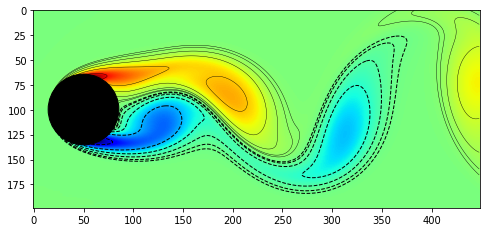

In [42]:
createMovie(X_new)